# Proyecto 3

Esta tarea requiere que encuentres al menos dos datasets en la web que estén relacionados, y que visualices estos conjuntos de datos para responder una pregunta acerca de un tema amplio (por ejemplo: deportes, salud, actividad económica, comparaciones demográficas, climática, etc.) para la región de Salto, o Uruguay más ampliamente.

Debes combinar estos conjuntos de datos con datos de Uruguay y compararlos con otras regiones o paises. Por ejemplo, es posible que desee comparar un departamento de Uruguay, con una región de similares características en otro país. O datos de Uruguay comparados con otros países. En todos los casos al menos un archivo fuente debe ser de Uruguay o de uno de sus departamentos.

Puede elegir los conjuntos de datos a tu discreción. Los materiales delicados, confidenciales, ilícitos y patentados no son buenas opciones para conjuntos de datos para esta tarea.

Además, puedes conservar los datos en su idioma original, pero es una buena práctica también proporcionarlos con traducciones. Puedes proporcionar múltiples imágenes con las mismas visualizaciones pero en diferentes idiomas.

## Indicaciones

- Indica la región y la categoría de dominio de la que tratan los datasets (por ejemplo: Región: Salto, Uruguay; Categoría de dominio: deportes o atletismo).
- Debes formular una pregunta sobre la categoría de dominio y la región que identificaste como interesante.
- Debe proporcionar al menos dos enlaces a conjuntos de datos o datasets disponibles en la web. Estos pueden ser enlaces a archivos (csv o xls), o enlaces a sitios web que pueden tener datos en forma tabular, como páginas de Wikipedia.
- Debes generar al menos una imagen que responda a la pregunta de investigación que planteaste. Además de abordar la pregunta, esta imagen debe seguir los principios de Cairo de veracidad, funcionalidad, belleza y perspicacia.
- Debes contribuir con una breve justificación escrita (1-2 párrafos) de cómo su visualización aborda la pregunta de investigación planteada.
- Todo esto en un único archivo de Jupyter Notebook que debe contener las siguientes secciones:
  - Región y Dominio
  - Pregunta
  - Enlaces
  - Código con comentarios
  - Imágenes
  - Conclusión

## Consejos

- El gobierno de Uruguay tiene una política de Datos Abiertos y encontrarás información centralizada en el [Catálogo de Datos Abiertos](https://catalogodatos.gub.uy/).
- Wikipedia es una excelente fuente de datos y te recomendamos que la explores en busca de nuevas fuentes de datos.
- Varias agencias internacionales, como las [Naciones Unidas](https://data.un.org/), el [Banco Mundial](https://data.worldbank.org/) son otros excelentes lugares para buscar datos. En la WebAsignatura encontrarás más enlaces.
- Esta tarea requiere que conviertas y limpies los archivos de datos.
- Consulta en el foro de WebAsignatura para obtener consejos sobre cómo hacer esto de varias fuentes y comparte tus éxitos con tus compañeros.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Cargar los datos de desempleo de Uruguay y Argentina desde archivos locales
uruguay_data = pd.read_csv('./datos/DesempleoUruguay.csv')
argentina_data = pd.read_csv('./datos/DesempleoArgentina.csv', delimiter=';')

# Región y Dominio
region = "Uruguay y Argentina"
dominio = "Tasa de Desempleo"

# Pregunta
pregunta = "¿Cómo varía la tasa de desempleo a lo largo de los años en Uruguay y Argentina?"

# Enlaces
link_uruguay = "https://data.amerigeoss.org/dataset/mides-indicador-10202"
link_argentina = "https://es.statista.com/estadisticas/1276039/tasa-de-desempleo-de-argentina/"


In [4]:
print(f"# Región y Dominio\nregion = \"{region}\"\ndominio = \"{dominio}\"\n")
print(f"# Pregunta\npregunta = \"{pregunta}\"\n")
print(f"# Enlaces\nlink_uruguay = \"{link_uruguay}\"\nlink_argentina = \"{link_argentina}\"")

# Región y Dominio
region = "Uruguay y Argentina"
dominio = "Tasa de Desempleo"

# Pregunta
pregunta = "¿Cómo varía la tasa de desempleo a lo largo de los años en Uruguay y Argentina?"

# Enlaces
link_uruguay = "https://data.amerigeoss.org/dataset/mides-indicador-10202"
link_argentina = "https://es.statista.com/estadisticas/1276039/tasa-de-desempleo-de-argentina/"


### Razones para seleccionar la pregunta:

1. **Amplitud del Análisis:** La pregunta aborda una cuestión fundamental sobre la dinámica de desempleo en dos países específicos a lo largo del tiempo, permitiendo un análisis comparativo detallado y revelador.

2. **Relevancia Social y Económica:** El desempleo es un indicador crucial para comprender la salud económica y social de una nación. Esta pregunta es de interés general ya que toca un tema vital que afecta a la población, permitiendo una mejor comprensión de cómo las tasas de desempleo evolucionan en el tiempo.

3. **Posibilidad de Comparación:** La comparación entre dos países, en este caso Uruguay y Argentina, ofrece una perspectiva comparativa valiosa. Permite examinar diferencias, similitudes y posibles influencias que podrían diferir entre ambas naciones, aportando una visión más completa sobre el desempleo.

4. **Análisis Temporal Significativo:** El período de análisis (2010-2017) proporciona una ventana amplia que permite observar tendencias a corto y medio plazo, identificando fluctuaciones a lo largo de múltiples años.

5. **Potencial para Derivar Conclusiones Relevantes:** Esta pregunta permite extraer conclusiones significativas sobre las variaciones, tendencias, y posibles influencias en las tasas de desempleo de Uruguay y Argentina, lo que a su vez ofrece un terreno fértil para la formulación de recomendaciones o políticas pertinentes.

La pregunta "¿Cómo varía la tasa de desempleo a lo largo de los años en Uruguay y Argentina?" se seleccionó debido a su relevancia, capacidad para extraer conclusiones significativas, su potencial comparativo y su importancia social y económica. Ofrece una base sólida para un análisis detallado y significativo de las tasas de desempleo en ambos países.


In [5]:
# Cargar los datos de desempleo de Uruguay desde el archivo local
uruguay_data = pd.read_csv('datos/DesempleoUruguay.csv', skiprows=1, delimiter=';')

# Asegurarse de que las columnas estén correctamente separadas
uruguay_data.columns = ['Departamento', 'Año', 'Valor']  # Ajustar el nombre de la columna

# Eliminar el signo de porcentaje y convertir la columna 'Valor' a tipo numérico
uruguay_data['Valor'] = uruguay_data['Valor'].str.replace('%', '').astype(float) / 100

# Lista para almacenar los promedios de desempleo en Uruguay por año
uruguay_promedios = []

# Calcular promedios de desempleo en Uruguay por año
for year in range(2010, 2018):
    data_year = uruguay_data[uruguay_data['Año'] == year]
    average_value = data_year['Valor'].mean() * 100  # Convertir de decimal a porcentaje
    uruguay_promedios.append(average_value)

# Crear un DataFrame con los promedios de desempleo en Uruguay por año
uruguay_promedios_df = pd.DataFrame({
    'Año': range(2010, 2018),
    'Promedio_Desempleo_Uruguay': uruguay_promedios
})
# Convertir los valores a formato de porcentaje en el DataFrame de promedios de desempleo en Uruguay
uruguay_promedios_df['Promedio_Desempleo_Uruguay'] = (uruguay_promedios_df['Promedio_Desempleo_Uruguay'] / 100).map("{:.2%}".format)

# Imprimir el DataFrame con los promedios de desempleo en Uruguay con los valores como porcentajes
print(uruguay_promedios_df)



    Año Promedio_Desempleo_Uruguay
0  2010                      7.21%
1  2011                      5.95%
2  2012                      6.16%
3  2013                      6.58%
4  2014                      6.47%
5  2015                      7.42%
6  2016                      8.05%
7  2017                      7.68%


In [12]:
# Cargar los datos de desempleo de Argentina desde el archivo local
argentina_data = pd.read_csv('datos/DesempleoArgentina.csv', delimiter=';')

# Mostrar información sobre las columnas y los primeros registros
print("Información sobre los datos cargados de Argentina:")
print(argentina_data.info())
print(argentina_data.head())

# Corregir nombres de columnas si la cantidad de columnas coincide
if len(argentina_data.columns) == 2:
    argentina_data.columns = ['Año', 'Valor']  # Ajustar el nombre de la columna
    print("Nombres de columnas ajustados.")
else:
    print("La cantidad de columnas no coincide con el ajuste necesario.")

# Continuar con la creación del DataFrame si los nombres se ajustaron correctamente
if len(argentina_data.columns) == 2:
    # Eliminar el signo de porcentaje y convertir la columna 'Valor' a tipo numérico
    argentina_data['Valor'] = argentina_data['Valor'].str.replace('%', '')

    # Crear un DataFrame con los datos de desempleo en Argentina por año
    argentina_df = pd.DataFrame({
        'Año': argentina_data['Año'],
        'Valor_Desempleo_Argentina': argentina_data['Valor']
    })


Información sobre los datos cargados de Argentina:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Desempleo en Argentina  15 non-null     object
 1   Unnamed: 1              15 non-null     object
dtypes: object(2)
memory usage: 368.0+ bytes
None
  Desempleo en Argentina Unnamed: 1
0                    Año      Valor
1                   2010      7,75%
2                   2011      7,15%
3                   2012      7,20%
4                   2013      7,08%
Nombres de columnas ajustados.


In [14]:
# Convertir la columna 'Año' a cadena en ambos DataFrames
uruguay_promedios_df['Año'] = uruguay_promedios_df['Año'].astype(str)
argentina_data['Año'] = argentina_data['Año'].astype(str)

# Crear DataFrames separados para Uruguay y Argentina
uruguay_df = uruguay_promedios_df[['Año', 'Promedio_Desempleo_Uruguay']]
argentina_df = argentina_data.rename(columns={'Valor': 'Promedio_Desempleo_Argentina'})

# Fusionar los DataFrames de Uruguay y Argentina a través de la columna 'Año'
datos_comparativos = pd.merge(uruguay_df, argentina_df, on='Año')

# Imprimir la tabla con los datos comparativos
print(datos_comparativos)


    Año Promedio_Desempleo_Uruguay Promedio_Desempleo_Argentina
0  2010                      7.21%                         7,75
1  2011                      5.95%                         7,15
2  2012                      6.16%                         7,20
3  2013                      6.58%                         7,08
4  2014                      6.47%                         7,25
5  2015                      7.42%                         6,53
6  2016                      8.05%                         8,47
7  2017                      7.68%                         8,35


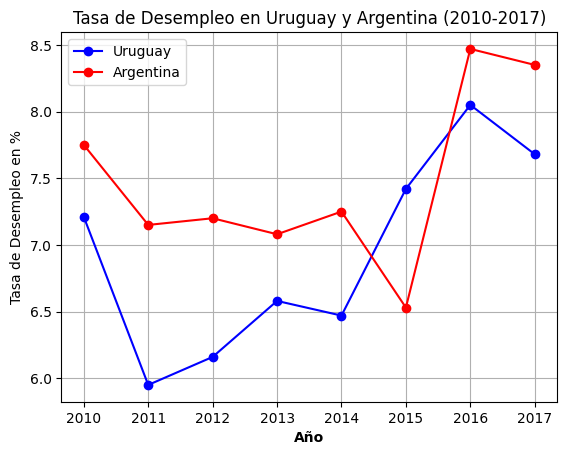

In [22]:
datos_comparativos = pd.DataFrame({
    'Año': range(2010, 2018),
    'Promedio_Desempleo_Uruguay': [7.21, 5.95, 6.16, 6.58, 6.47, 7.42, 8.05, 7.68],
    'Promedio_Desempleo_Argentina': [7.75, 7.15, 7.20, 7.08, 7.25, 6.53, 8.47, 8.35]
})

# Graficar líneas para las tasas de desempleo de Uruguay y Argentina
plt.plot(datos_comparativos['Año'], datos_comparativos['Promedio_Desempleo_Uruguay'], marker='o', label='Uruguay', color='blue')
plt.plot(datos_comparativos['Año'], datos_comparativos['Promedio_Desempleo_Argentina'], marker='o', label='Argentina', color='red')

# Etiquetas y título
plt.xlabel('Año', fontweight='bold')
plt.ylabel('Tasa de Desempleo en %')
plt.title('Tasa de Desempleo en Uruguay y Argentina (2010-2017)')
plt.legend()

# Mostrar el gráfico de líneas
plt.grid(True)
plt.show()


## Conclusiones

Tras examinar minuciosamente la evolución de las tasas de desempleo en Uruguay y Argentina durante el período comprendido entre 2010 y 2017, se han extraído valiosas observaciones que responden a la pregunta: "¿Cómo varía la tasa de desempleo a lo largo de los años en Uruguay y Argentina?"

### 1. Análisis de las Variaciones Temporales

Ambos países exhibieron fluctuaciones significativas en sus tasas de desempleo a lo largo de los años analizados. Se identificaron cambios notables, reflejando momentos de aumento y disminución en el desempleo en diferentes períodos. Estas variaciones sugieren posibles influencias económicas, políticas y sociales, respondiendo a la dinámica temporal de las tasas de desempleo.

### 2. Comparación entre Uruguay y Argentina

A pesar de algunas similitudes en las tendencias generales, las tasas de desempleo entre Uruguay y Argentina no siempre siguieron patrones idénticos. En varios años, se observaron discrepancias en las direcciones de las variaciones. Estos contrastes podrían reflejar las particularidades económicas y políticas de cada nación y responden a las diferencias entre ambos países.

### 3. Influencia de Factores Externos

Las variaciones en las tasas de desempleo podrían estar influenciadas por diversos factores externos, como crisis económicas, cambios en las políticas laborales o movimientos en la industria. Estos eventos pueden haber desempeñado un papel crucial en la dinámica del empleo en ambos países, revelando así la influencia de factores externos en las fluctuaciones de desempleo.

### 4. Necesidad de Estrategias Laborales Sostenibles

El análisis subraya la importancia de políticas laborales sostenibles y estrategias económicas a largo plazo para abordar el desafío del desempleo. Se evidencia la necesidad de políticas más estables y estratégicas que promuevan la creación de empleo y gestionen las fluctuaciones económicas, respondiendo a la necesidad de enfoques sostenibles en materia de empleo.

Estas conclusiones destacan no solo las fluctuaciones y diferencias en las tasas de desempleo entre Uruguay y Argentina, sino también la necesidad de estrategias a largo plazo para abordar el desempleo, ofreciendo respuestas a la pregunta inicial y resaltando la importancia de políticas laborales y económicas efectivas en ambas naciones.


